In [1]:
%matplotlib inline
import importlib
import nn
importlib.reload(nn)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nn import NeuralNetwork
from sklearn.metrics import accuracy_score, f1_score

In [40]:
data_multimodal_train = pd.read_csv("dane_nn6/multimodal-sparse-training.csv")
X_multimodal_train = data_multimodal_train[['x']].values.reshape(-1, 1)
y_multimodal_train = data_multimodal_train['y'].values.reshape(-1, 1)

data_multimodal_test = pd.read_csv("dane_nn6/multimodal-sparse-test.csv")
X_multimodal_test = data_multimodal_test[['x']].values.reshape(-1, 1)
y_multimodal_test = data_multimodal_test['y'].values.reshape(-1, 1)

data_rings3_train = pd.read_csv("dane_nn6/rings3-balance-training.csv")
X_rings3_train = data_rings3_train[['x', 'y']].values.reshape(-1, 2)
y_rings3_train = data_rings3_train['c'].values.reshape(-1, 1)

data_rings3_test = pd.read_csv("dane_nn6/rings3-balance-test.csv")
X_rings3_test = data_rings3_test[['x', 'y']].values.reshape(-1, 2)
y_rings3_test = data_rings3_test['c'].values.reshape(-1, 1)

data_rings5_train = pd.read_csv("dane_nn6/rings5-sparse-training.csv")
X_rings5_train = data_rings5_train[['x', 'y']].values.reshape(-1, 2)
y_rings5_train = data_rings5_train['c'].values.reshape(-1, 1)

data_rings5_test = pd.read_csv("dane_nn6/rings5-sparse-test.csv")
X_rings5_test = data_rings5_test[['x', 'y']].values.reshape(-1, 2)
y_rings5_test = data_rings5_test['c'].values.reshape(-1, 1)

data_xor3_train = pd.read_csv("dane_nn6/xor3-balance-training.csv")
X_xor3_train = data_xor3_train[['x', 'y']].values.reshape(-1, 2)
y_xor3_train = data_xor3_train['c'].values.reshape(-1, 1)

data_xor3_test = pd.read_csv("dane_nn6/xor3-balance-test.csv")
X_xor3_test = data_xor3_test[['x', 'y']].values.reshape(-1, 2)
y_xor3_test = data_xor3_test['c'].values.reshape(-1, 1)


In [34]:
def plot_classification_results(X_test, y_test, y_pred, title='Classification Results'):
    y_test = y_test.ravel()
    y_pred = y_pred.ravel()
    
    # Identify misclassified points
    misclassified = y_pred != y_test
    
    # Plot correctly classified points
    scatter = plt.scatter(X_test[~misclassified, 0], X_test[~misclassified, 1], 
                          c=y_test[~misclassified], cmap='viridis')
    
    # Plot misclassified points
    plt.scatter(X_test[misclassified, 0], X_test[misclassified, 1],
                color='red', marker='x', s=100, 
                label='Misclassified')
    
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()

In [49]:
def lambda_grid_search(layers, X_train, y_train, X_test, y_test, lambda_values, regularization, epochs=1000):
    results = []
    best_model = None
    best_fscore = 0
    for lmbda in lambda_values:
        nn = NeuralNetwork(X_train, y_train, layers,
                            activation_fun="tanh", output_activation="softmax", loss_fun="crossentropy")
        nn.train(epochs=int(epochs), learning_rate=0.001, validation_data=(X_test, y_test),
                    mini_batch=True, batch_size=16, optimization="rmsprop", momentum=0, stop_condition=0.1,
                    regularization="l1", reg_lambda=lmbda)
        
        results.append(nn.model_history())
        y_pred = nn.predict(X_test)
        y_pred = np.argmax(y_pred, axis=1).reshape(-1, 1)
        fscore = f1_score(y_test, y_pred, average='macro')
        if fscore > best_fscore:
            best_fscore = fscore
            best_model = nn
    print(f"Best model with lambda: {best_model.reg_lambda}, F1 Score: {best_fscore}")
    return results, best_model

In [60]:
nn_multimodal = NeuralNetwork(X_multimodal_train, y_multimodal_train, [1, 32, 64, 32, 1],
                              activation_fun="sigmoid", output_activation="linear", loss_fun="mse")
nn_multimodal.train(epochs=int(1e5), learning_rate=0.001, validation_data=(X_multimodal_test, y_multimodal_test),
            mini_batch=True, batch_size=100, optimization="momentum", momentum=0.7, stop_condition=0.1)

Starting loss: 6210.43


Training: 100%|████████████████████████████████████████████████████████████████████| 100000/100000 [00:45<00:00] , Loss:  Current:47.9477,Best:47.2893


Training complete. Final loss: 47.2893


In [61]:
nn_multimodal_l1 = NeuralNetwork(X_multimodal_train, y_multimodal_train, [1, 32, 64, 32, 1],
                              activation_fun="sigmoid", output_activation="linear", loss_fun="mse")
nn_multimodal_l1.train(epochs=int(1e5), learning_rate=0.001, validation_data=(X_multimodal_test, y_multimodal_test),
            mini_batch=True, batch_size=100, optimization="momentum", momentum=0.7, stop_condition=0.1,
            regularization="l1", reg_lambda=0.01)

Starting loss: 6186.15


Training: 100%|██████████████████████████████████████████████████████████████████| 100000/100000 [00:49<00:00] , Loss:  Current:154.0649,Best:151.9106


Training complete. Final loss: 151.9106


In [62]:
nn_multimodal_l2 = NeuralNetwork(X_multimodal_train, y_multimodal_train, [1, 32, 64, 32, 1],
                              activation_fun="sigmoid", output_activation="linear", loss_fun="mse")
nn_multimodal_l2.train(epochs=int(1e5), learning_rate=0.001, validation_data=(X_multimodal_test, y_multimodal_test),
            mini_batch=True, batch_size=100, optimization="momentum", momentum=0.7, stop_condition=0.1,
            regularization="l2", reg_lambda=1e-4)

Starting loss: 6255.86


Training: 100%|████████████████████████████████████████████████████████████████████| 100000/100000 [00:48<00:00] , Loss:  Current:33.6940,Best:33.6940


Training complete. Final loss: 33.6940


MSE Multimodal: 47.289340047024815
MSE Multimodal L1: 100.3085465501091
MSE Multimodal L2: 31.072444213833087


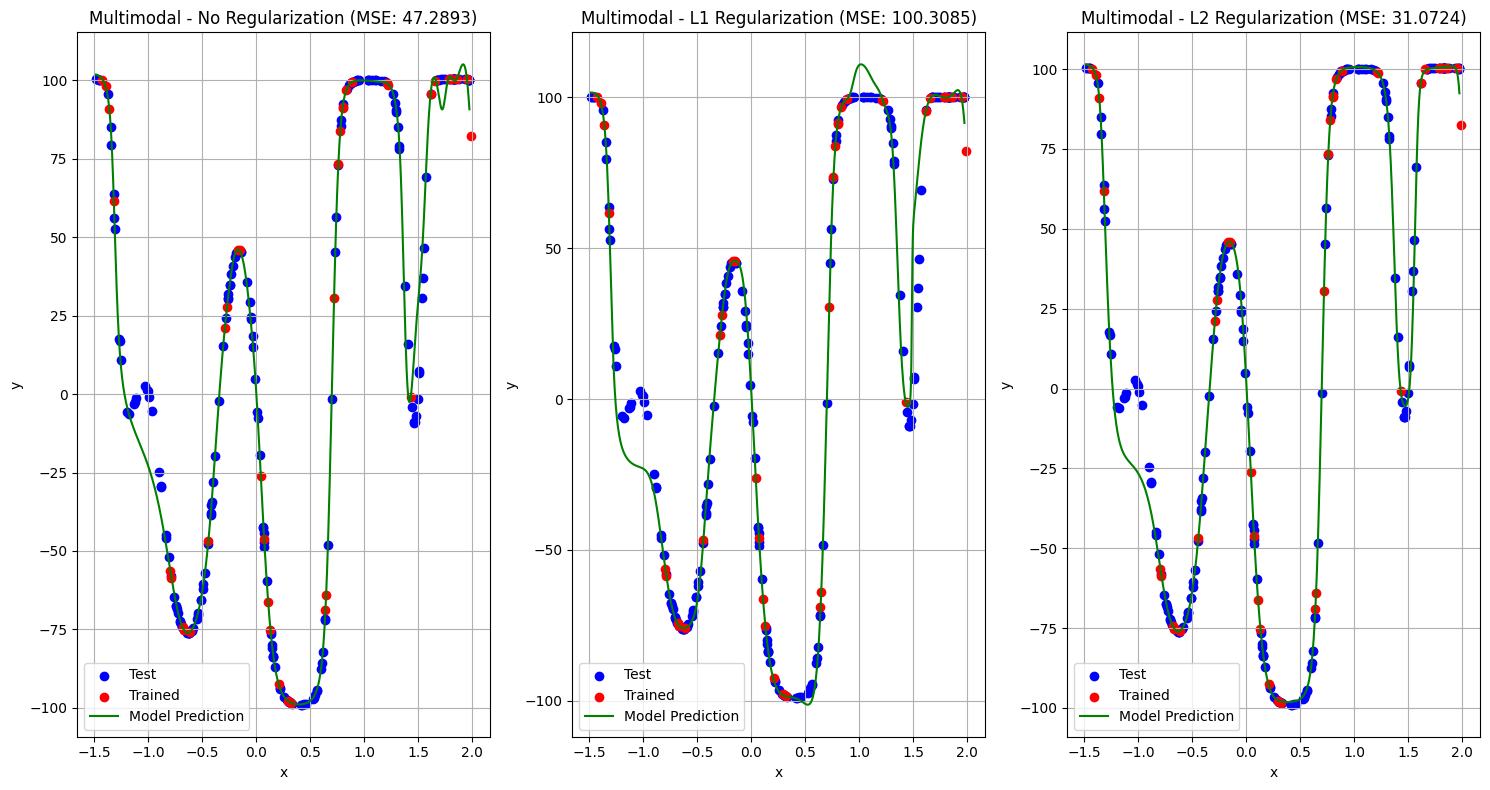

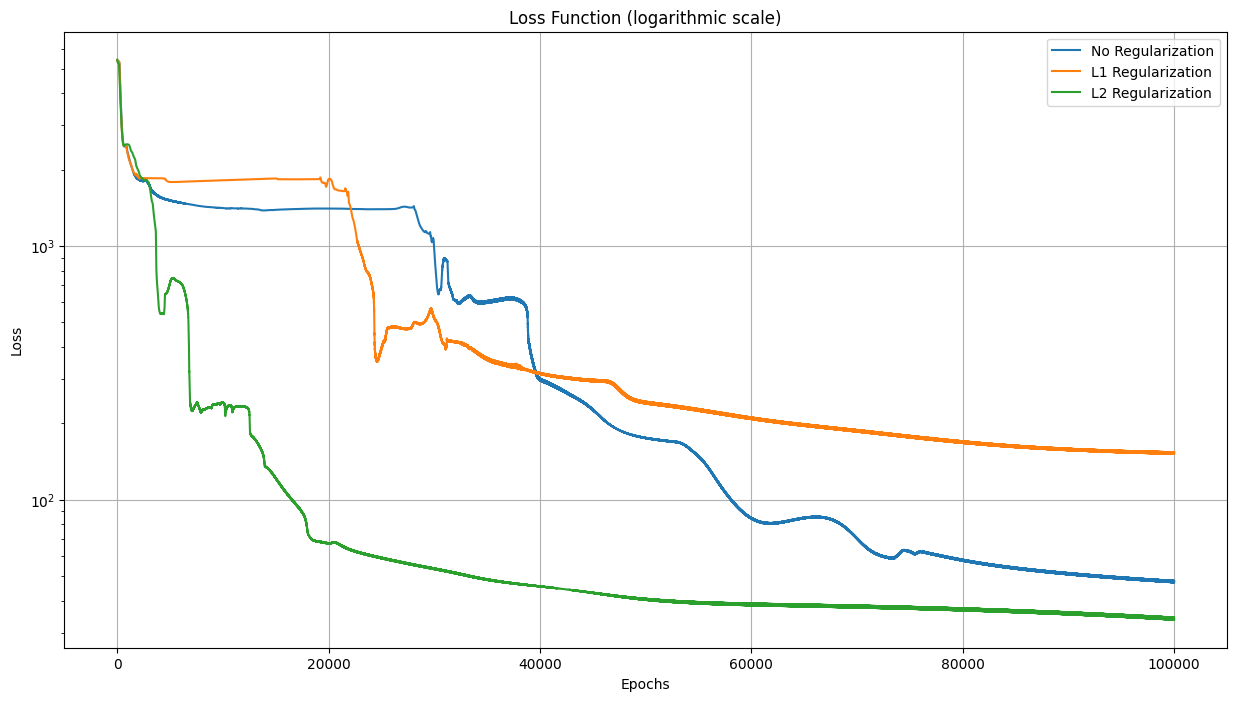

In [ ]:
loss_mult = np.mean((nn_multimodal.predict(X_multimodal_test) - y_multimodal_test) ** 2)
loss_mult_l1 = np.mean((nn_multimodal_l1.predict(X_multimodal_test) - y_multimodal_test) ** 2)
loss_mult_l2 = np.mean((nn_multimodal_l2.predict(X_multimodal_test) - y_multimodal_test) ** 2)

print("MSE Multimodal:", loss_mult)
print("MSE Multimodal L1:", loss_mult_l1)
print("MSE Multimodal L2:", loss_mult_l2)

x = np.linspace(np.min(X_multimodal_test), np.max(X_multimodal_test), 1000).reshape(-1, 1)

plt.figure(figsize=(15, 8))
plt.subplot(1, 3, 1)
plt.scatter(X_multimodal_test, y_multimodal_test, c='blue', label='Test')
plt.scatter(X_multimodal_train, y_multimodal_train, c='red', label='Train')
plt.plot(x, nn_multimodal.predict(x), c='green', label='Model Prediction')
plt.title('Multimodal - No Regularization' + f' (MSE: {loss_mult:.4f})')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.subplot(1, 3, 2)
plt.scatter(X_multimodal_test, y_multimodal_test, c='blue', label='Test')
plt.scatter(X_multimodal_train, y_multimodal_train, c='red', label='Train')
plt.plot(x, nn_multimodal_l1.predict(x), c='green', label='Model Prediction')
plt.title('Multimodal - L1 Regularization' + f' (MSE: {loss_mult_l1:.4f})')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.subplot(1, 3, 3)
plt.scatter(X_multimodal_test, y_multimodal_test, c='blue', label='Test')
plt.scatter(X_multimodal_train, y_multimodal_train, c='red', label='Train')
plt.plot(x, nn_multimodal_l2.predict(x), c='green', label='Model Prediction')
plt.title('Multimodal - L2 Regularization' + f' (MSE: {loss_mult_l2:.4f})')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

loss = nn_multimodal.model_history()
loss_l1 = nn_multimodal_l1.model_history()
loss_l2 = nn_multimodal_l2.model_history()

plt.figure(figsize=(15, 8))
plt.plot(loss, label='No Regularization')
plt.plot(loss_l1, label='L1 Regularization')
plt.plot(loss_l2, label='L2 Regularization')
plt.title('Loss Function (logarithmic scale)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

### Rings3 dataset

In [12]:
X_rings3_train.shape, y_rings3_train.shape, X_rings3_test.shape, y_rings3_test.shape

((2060, 2), (2060, 1), (2000, 2), (2000, 1))

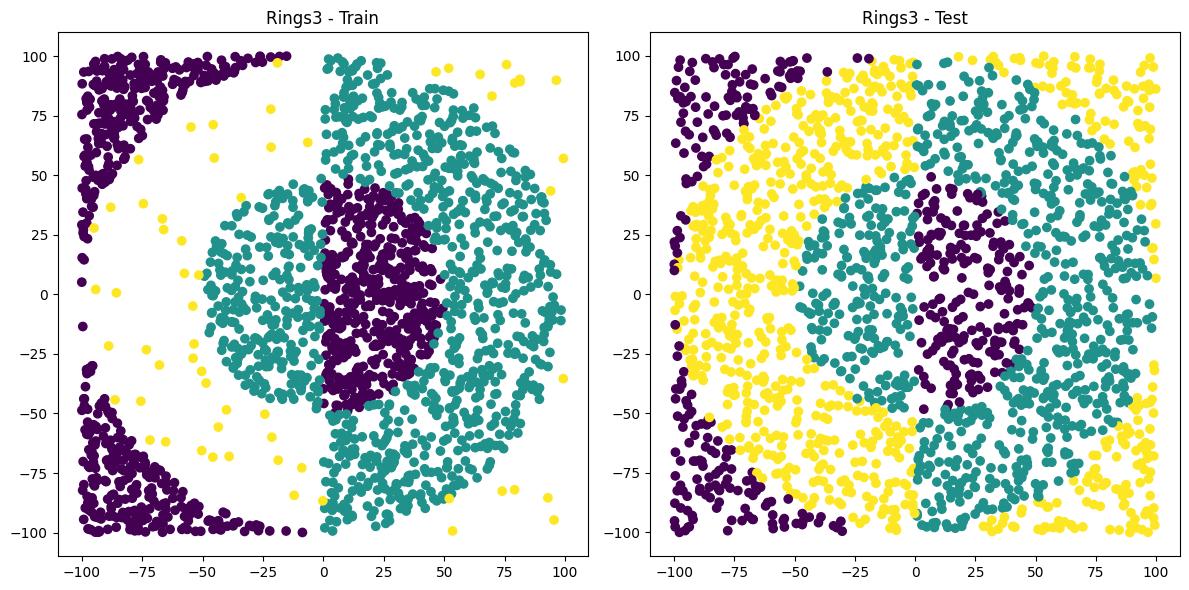

In [15]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_rings3_train[:, 0], X_rings3_train[:, 1], c=y_rings3_train, label='Train')
plt.title('Rings3 - Train')
plt.subplot(1, 2, 2)
plt.scatter(X_rings3_test[:, 0], X_rings3_test[:, 1], c=y_rings3_test, label='Test')
plt.title('Rings3 - Test')
plt.tight_layout()
plt.show()

In [3]:
input_size = X_rings3_train.shape[1]
output_size = np.unique(y_rings3_train).shape[0]

In [53]:
lambda_values = [0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]

loss_histories_l1, nn_rings3_l1 = lambda_grid_search([input_size, 32, 32, output_size], X_rings3_train, y_rings3_train, X_rings3_test, y_rings3_test,
                                        lambda_values, regularization="l1", epochs=1e3)

loss_histories_l2, nn_rings3_l2 = lambda_grid_search([input_size, 32, 32, output_size], X_rings3_train, y_rings3_train, X_rings3_test, y_rings3_test,
                                        lambda_values, regularization="l2", epochs=1e3)

Starting loss: 1.91


Training: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00] , Loss:  Current: 0.8791,Best: 0.4671



Training complete. Final loss: 0.4671
Starting loss: 23.06


Training: 100%|███████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00] , Loss:  Current:185.4159,Best:22.4605



Training complete. Final loss: 22.4605
Starting loss: 3.68


Training: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:30<00:00] , Loss:  Current:16.8107,Best: 3.5494



Training complete. Final loss: 3.5494
Starting loss: 1.87


Training: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:30<00:00] , Loss:  Current: 2.4311,Best: 1.3393



Training complete. Final loss: 1.3393
Starting loss: 2.11


Training: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00] , Loss:  Current: 0.8202,Best: 0.5345



Training complete. Final loss: 0.5345
Starting loss: 1.76


Training: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00] , Loss:  Current: 0.7507,Best: 0.4743



Training complete. Final loss: 0.4743
Best model with lambda: 0.0001, F1 Score: 0.859851709488157
Starting loss: 1.77


Training: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:27<00:00] , Loss:  Current: 0.8026,Best: 0.5289



Training complete. Final loss: 0.5289
Starting loss: 21.78


Training: 100%|███████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00] , Loss:  Current:170.9426,Best:21.3881



Training complete. Final loss: 21.3881
Starting loss: 3.72


Training: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00] , Loss:  Current:21.6856,Best: 3.4575



Training complete. Final loss: 3.4575
Starting loss: 2.18


Training: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00] , Loss:  Current: 2.5154,Best: 1.3612



Training complete. Final loss: 1.3612
Starting loss: 1.92


Training: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00] , Loss:  Current: 0.8784,Best: 0.5316



Training complete. Final loss: 0.5316
Starting loss: 1.77


Training: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00] , Loss:  Current: 0.7311,Best: 0.5594


Training complete. Final loss: 0.5594
Best model with lambda: 0.0001, F1 Score: 0.8151000356790098


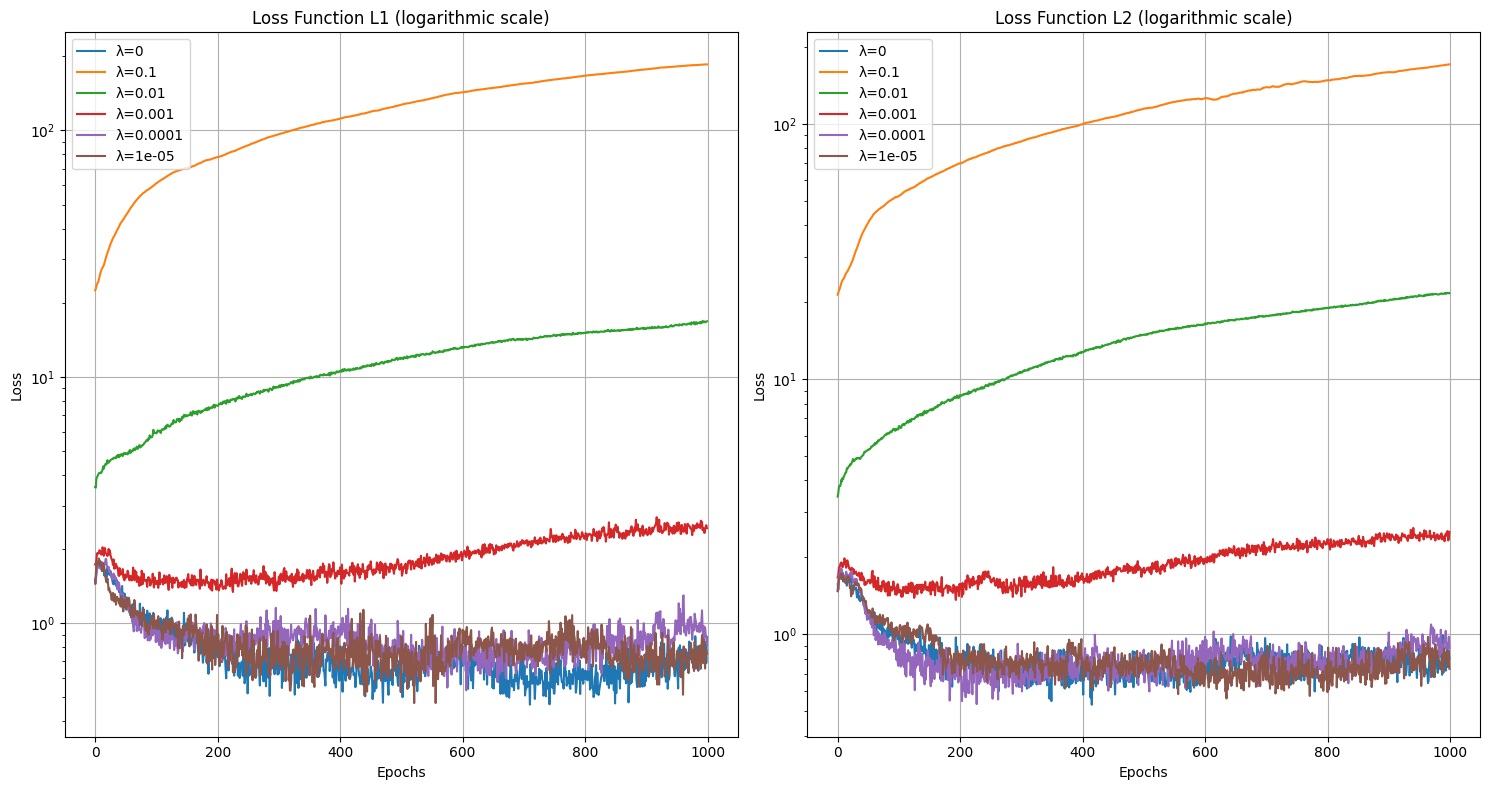

In [55]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
for lh in loss_histories_l1:
    plt.plot(lh, label=f'λ={lambda_values[loss_histories_l1.index(lh)]}')
plt.title('Loss Function L1 (logarithmic scale)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.subplot(1, 2, 2)
for lh in loss_histories_l2:
    plt.plot(lh, label=f'λ={lambda_values[loss_histories_l2.index(lh)]}')
plt.title('Loss Function L2 (logarithmic scale)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

F-score Rings3 L1: 0.859851709488157
F-score Rings3 L2: 0.8151000356790098


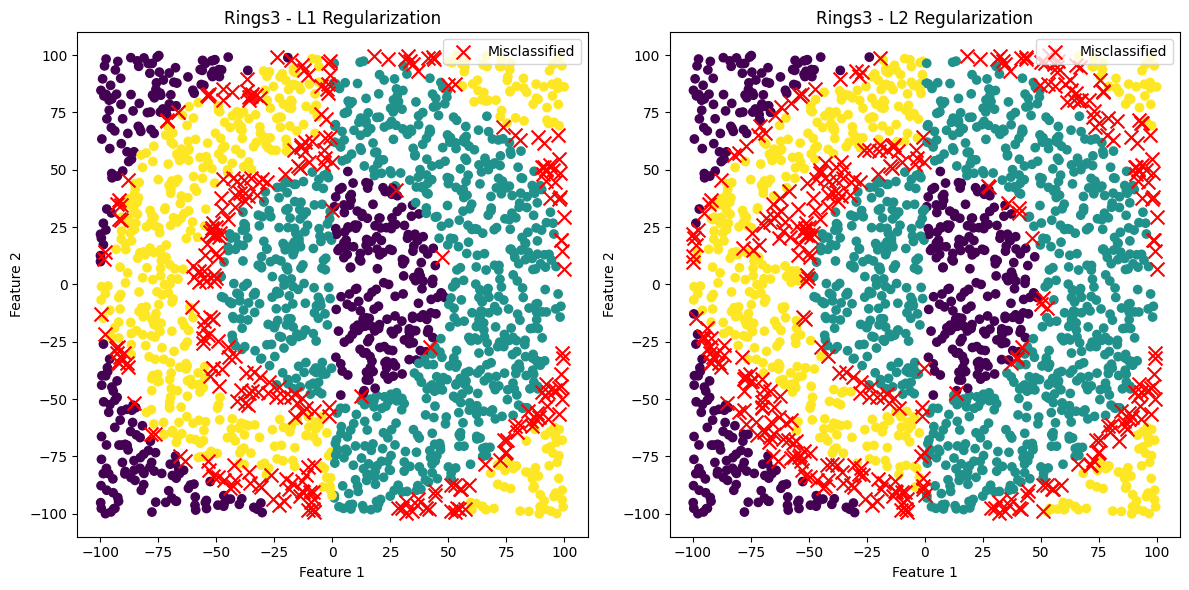

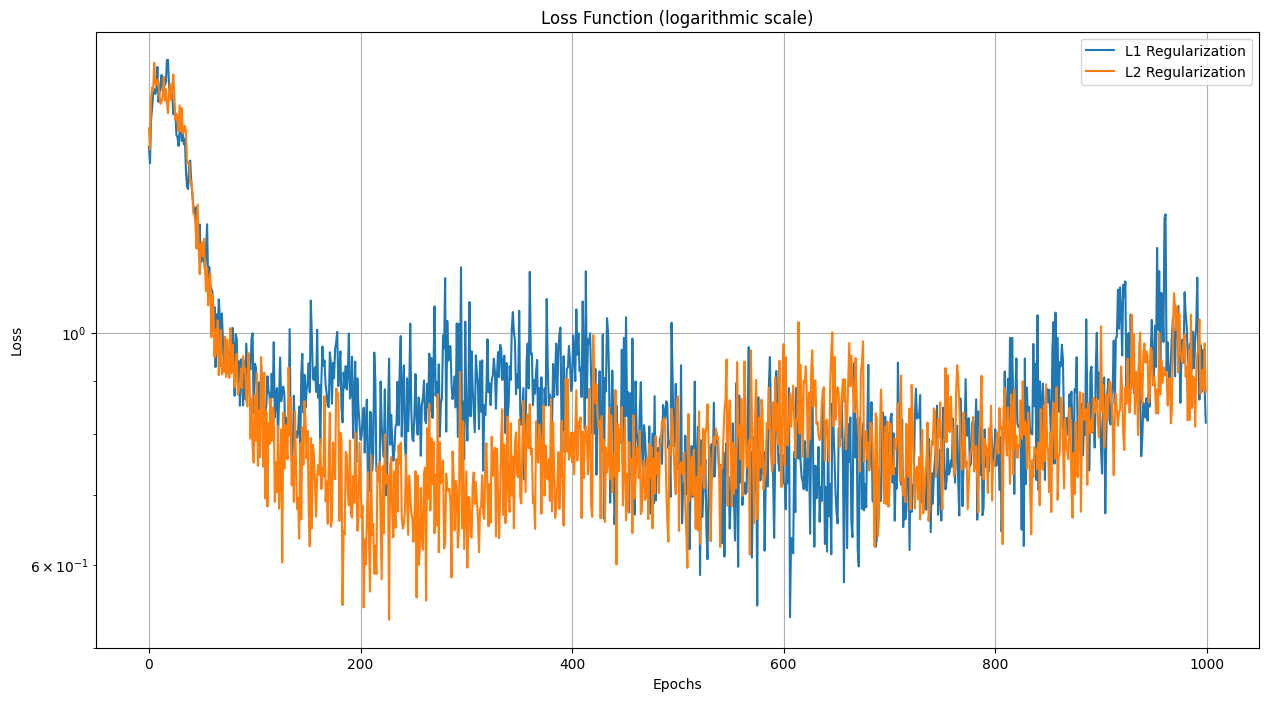

In [56]:
y_pred_l1 = nn_rings3_l1.predict(X_rings3_test)
y_pred_l1 = np.argmax(y_pred_l1, axis=1).reshape(-1, 1)
y_pred_l2 = nn_rings3_l2.predict(X_rings3_test)
y_pred_l2 = np.argmax(y_pred_l2, axis=1).reshape(-1, 1)

print("F-score Rings3 L1:", f1_score(y_rings3_test, y_pred_l1, average='macro'))
print("F-score Rings3 L2:", f1_score(y_rings3_test, y_pred_l2, average='macro'))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_classification_results(X_rings3_test, y_rings3_test, y_pred_l1, title='Rings3 - L1 Regularization')
plt.subplot(1, 2, 2)
plot_classification_results(X_rings3_test, y_rings3_test, y_pred_l2, title='Rings3 - L2 Regularization')
plt.tight_layout()
plt.show()

loss_l1 = nn_rings3_l1.model_history()
loss_l2 = nn_rings3_l2.model_history()

plt.figure(figsize=(15, 8))
plt.plot(loss_l1, label='L1 Regularization')
plt.plot(loss_l2, label='L2 Regularization')
plt.title('Loss Function (logarithmic scale)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

### Rings5 dataset

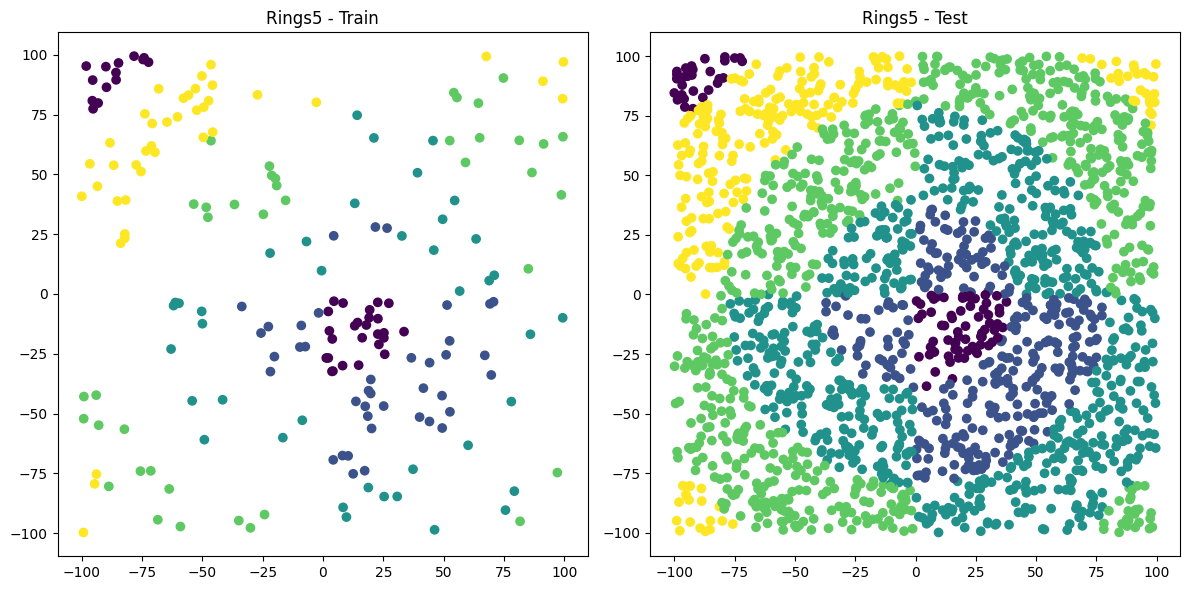

In [57]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_rings5_train[:, 0], X_rings5_train[:, 1], c=y_rings5_train, label='Train')
plt.title('Rings5 - Train')
plt.subplot(1, 2, 2)
plt.scatter(X_rings5_test[:, 0], X_rings5_test[:, 1], c=y_rings5_test, label='Test')
plt.title('Rings5 - Test')
plt.tight_layout()
plt.show()

In [58]:
input_size = X_rings5_train.shape[1]
output_size = np.unique(y_rings5_train).shape[0]

In [59]:
lambda_values = [0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]

loss_histories_l1, nn_rings5_l1 = lambda_grid_search([input_size, 32, 32, output_size], X_rings5_train, y_rings5_train, X_rings5_test, y_rings5_test,
                                        lambda_values, regularization="l1", epochs=1e3)
loss_histories_l2, nn_rings5_l2 = lambda_grid_search([input_size, 32, 32, output_size], X_rings5_train, y_rings5_train, X_rings5_test, y_rings5_test,
                                        lambda_values, regularization="l2", epochs=1e3)

Starting loss: 1.54


Training: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00] , Loss:  Current: 0.6349,Best: 0.6033



Training complete. Final loss: 0.6033
Starting loss: 22.34


Training: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00] , Loss:  Current:52.7468,Best:22.0230



Training complete. Final loss: 22.0230
Starting loss: 3.55


Training: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00] , Loss:  Current: 6.6036,Best: 3.4220



Training complete. Final loss: 3.4220
Starting loss: 1.96


Training: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00] , Loss:  Current: 1.2748,Best: 1.2293



Training complete. Final loss: 1.2293
Starting loss: 1.63


Training: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00] , Loss:  Current: 0.9337,Best: 0.8423



Training complete. Final loss: 0.8423
Starting loss: 1.92


Training: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00] , Loss:  Current: 0.6121,Best: 0.5766



Training complete. Final loss: 0.5766
Best model with lambda: 0, F1 Score: 0.785603686774072
Starting loss: 2.15


Training: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00] , Loss:  Current: 0.7754,Best: 0.6825



Training complete. Final loss: 0.6825
Starting loss: 22.07


Training: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00] , Loss:  Current:56.3959,Best:21.8270



Training complete. Final loss: 21.8270
Starting loss: 3.57


Training: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00] , Loss:  Current: 5.7887,Best: 3.5072



Training complete. Final loss: 3.5072
Starting loss: 2.03


Training: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00] , Loss:  Current: 1.3963,Best: 1.3067



Training complete. Final loss: 1.3067
Starting loss: 1.59


Training: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00] , Loss:  Current: 0.8610,Best: 0.8009



Training complete. Final loss: 0.8009
Starting loss: 1.90


Training: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00] , Loss:  Current: 0.6385,Best: 0.5893


Training complete. Final loss: 0.5893
Best model with lambda: 1e-05, F1 Score: 0.7809073045819263


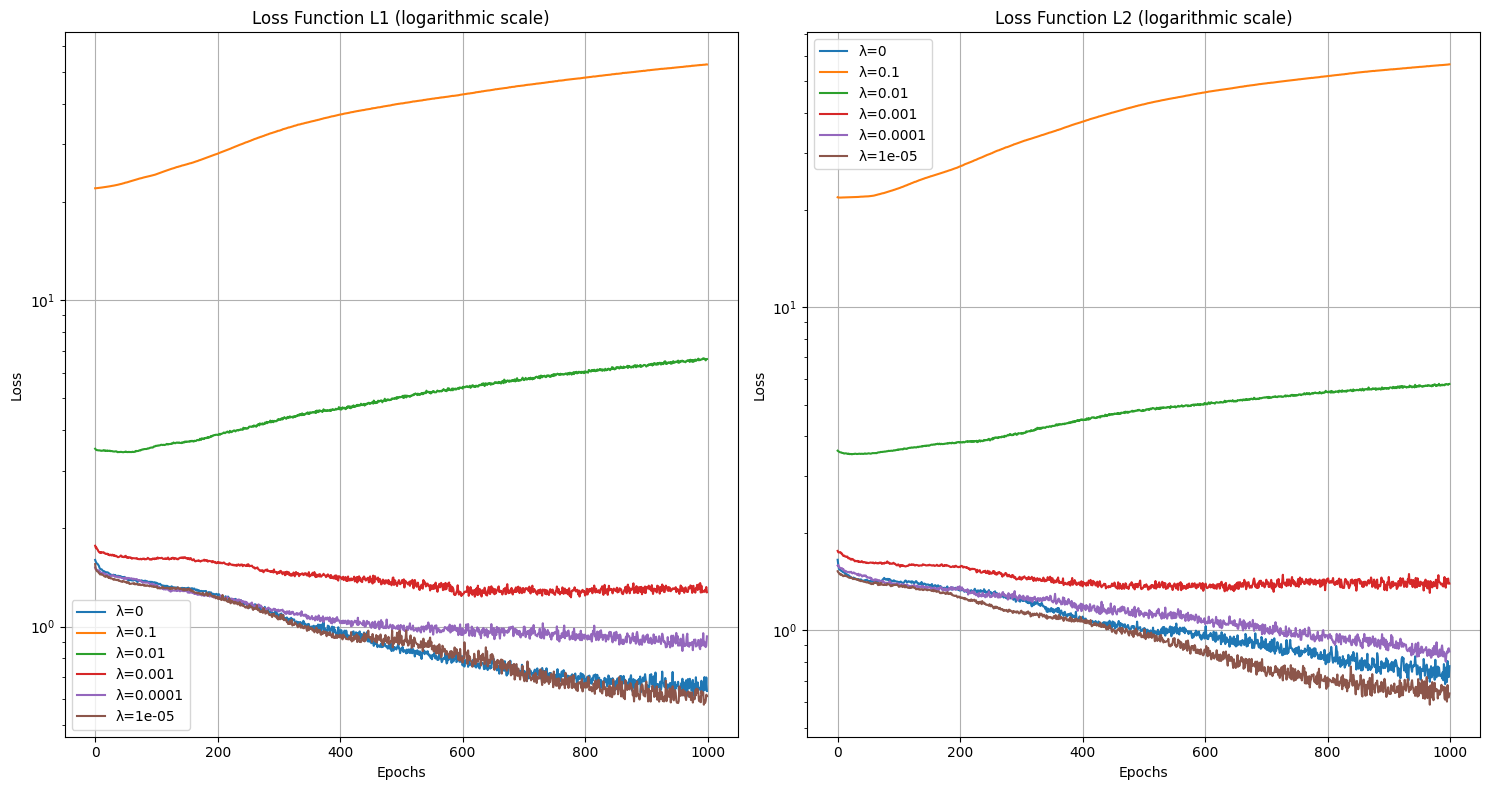

In [60]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
for lh in loss_histories_l1:
    plt.plot(lh, label=f'λ={lambda_values[loss_histories_l1.index(lh)]}')
plt.title('Loss Function L1 (logarithmic scale)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.subplot(1, 2, 2)
for lh in loss_histories_l2:
    plt.plot(lh, label=f'λ={lambda_values[loss_histories_l2.index(lh)]}')
plt.title('Loss Function L2 (logarithmic scale)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

F-score Rings5 L1: 0.785603686774072
F-score Rings5 L2: 0.7809073045819263


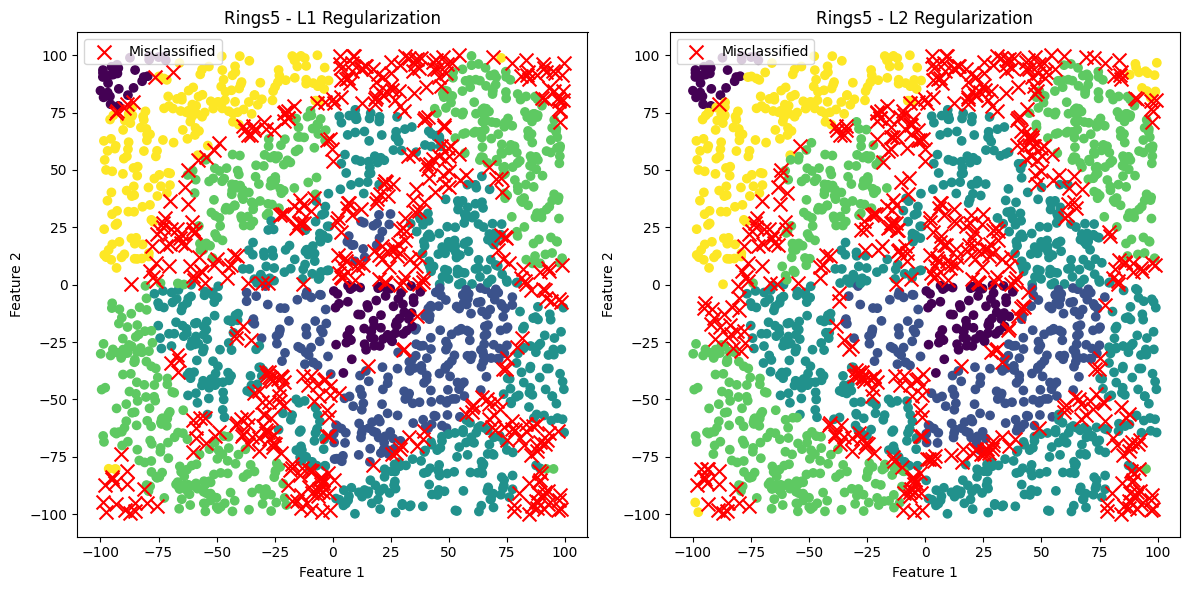

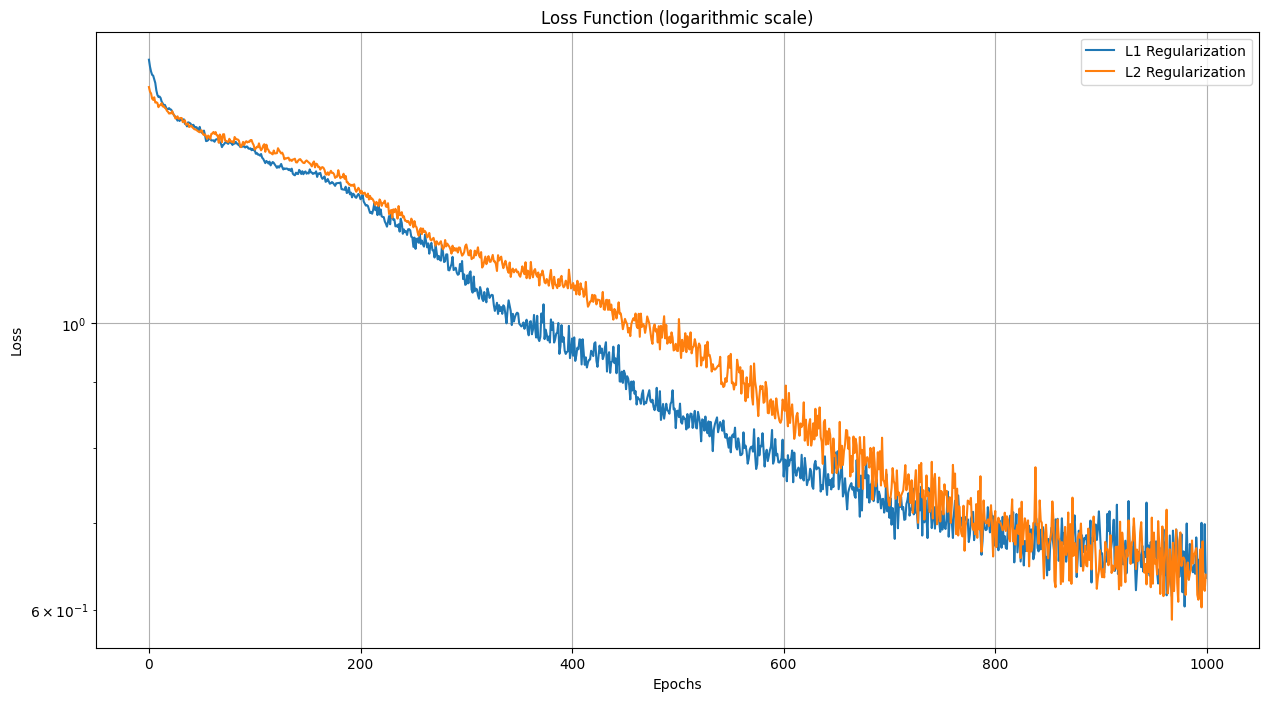

In [61]:
y_pred_l1 = nn_rings5_l1.predict(X_rings5_test)
y_pred_l1 = np.argmax(y_pred_l1, axis=1).reshape(-1, 1)
y_pred_l2 = nn_rings5_l2.predict(X_rings5_test)
y_pred_l2 = np.argmax(y_pred_l2, axis=1).reshape(-1, 1)

print("F-score Rings5 L1:", f1_score(y_rings5_test, y_pred_l1, average='macro'))
print("F-score Rings5 L2:", f1_score(y_rings5_test, y_pred_l2, average='macro'))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_classification_results(X_rings5_test, y_rings5_test, y_pred_l1, title='Rings5 - L1 Regularization')
plt.subplot(1, 2, 2)
plot_classification_results(X_rings5_test, y_rings5_test, y_pred_l2, title='Rings5 - L2 Regularization')
plt.tight_layout()
plt.show()

loss_l1 = nn_rings5_l1.model_history()
loss_l2 = nn_rings5_l2.model_history()

plt.figure(figsize=(15, 8))
plt.plot(loss_l1, label='L1 Regularization')
plt.plot(loss_l2, label='L2 Regularization')
plt.title('Loss Function (logarithmic scale)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

### XOR3 dataset

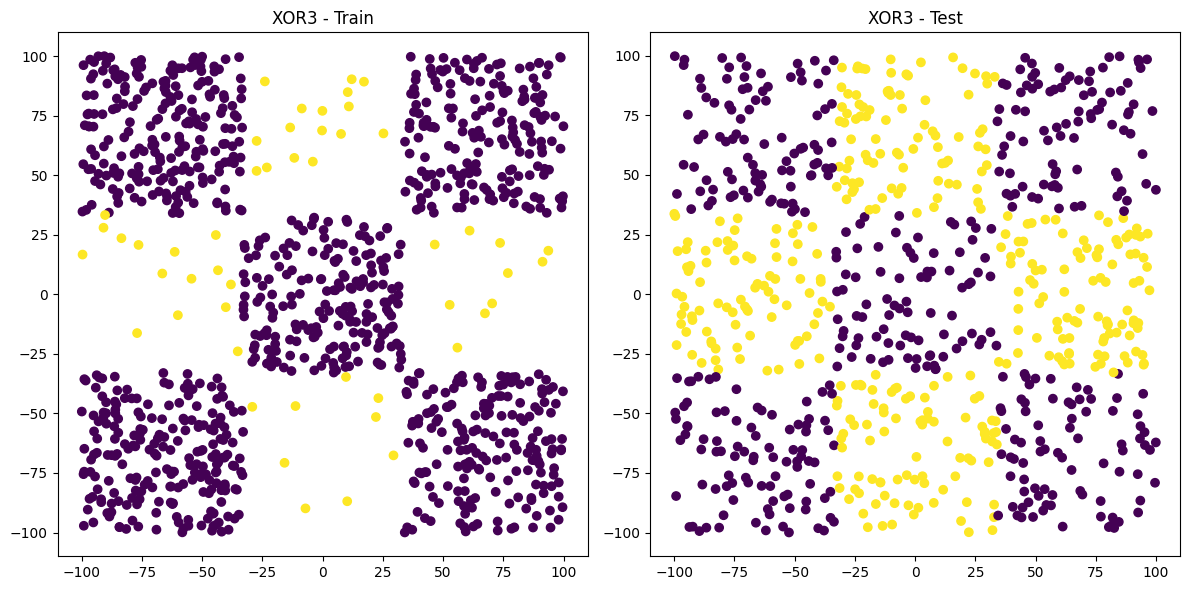

In [62]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_xor3_train[:, 0], X_xor3_train[:, 1], c=y_xor3_train, label='Train')
plt.title('XOR3 - Train')
plt.subplot(1, 2, 2)
plt.scatter(X_xor3_test[:, 0], X_xor3_test[:, 1], c=y_xor3_test, label='Test')
plt.title('XOR3 - Test')
plt.tight_layout()
plt.show()

In [63]:
input_size = X_xor3_train.shape[1]
output_size = np.unique(y_xor3_train).shape[0]

In [67]:
lambda_values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]

nn_xor3 = NeuralNetwork(X_xor3_train, y_xor3_train, [input_size, 16, 16, output_size],
                            activation_fun="tanh", output_activation="softmax", loss_fun="crossentropy")
nn_xor3.train(epochs=int(1e3), learning_rate=0.001, validation_data=(X_xor3_test, y_xor3_test),
                mini_batch=True, batch_size=16, optimization="rmsprop", momentum=0, stop_condition=0.1)
loss_xor3 = nn_xor3.model_history()

loss_histories_l1, nn_xor3_l1 = lambda_grid_search([input_size, 16, 16, output_size], X_xor3_train, y_xor3_train, X_xor3_test, y_xor3_test,
                                        lambda_values, regularization="l1", epochs=1e3)

loss_histories_l2, nn_xor3_l2 = lambda_grid_search([input_size, 16, 16, output_size], X_xor3_train, y_xor3_train, X_xor3_test, y_xor3_test,
                                        lambda_values, regularization="l2", epochs=1e3)

Starting loss: 0.86


Training: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00] , Loss:  Current: 0.7731,Best: 0.6912



Training complete. Final loss: 0.6912
Starting loss: 8.11


Training: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00] , Loss:  Current:25.0282,Best: 8.0138



Training complete. Final loss: 8.0138
Starting loss: 1.78


Training: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00] , Loss:  Current: 2.9207,Best: 1.5043



Training complete. Final loss: 1.5043
Starting loss: 1.02


Training: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00] , Loss:  Current: 1.0476,Best: 0.7663



Training complete. Final loss: 0.7663
Starting loss: 0.91


Training: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00] , Loss:  Current: 0.8447,Best: 0.7161



Training complete. Final loss: 0.7161
Starting loss: 0.80


Training: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00] , Loss:  Current: 0.8160,Best: 0.6993



Training complete. Final loss: 0.6993
Starting loss: 0.77


Training: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00] , Loss:  Current: 0.7816,Best: 0.6982



Training complete. Final loss: 0.6982
Best model with lambda: 0.01, F1 Score: 0.5731532616546487
Starting loss: 8.52


Training: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00] , Loss:  Current:28.3102,Best: 7.9397



Training complete. Final loss: 7.9397
Starting loss: 1.79


Training: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00] , Loss:  Current: 3.1506,Best: 1.4504



Training complete. Final loss: 1.4504
Starting loss: 0.96


Training: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00] , Loss:  Current: 1.0595,Best: 0.8088



Training complete. Final loss: 0.8088
Starting loss: 0.82


Training: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00] , Loss:  Current: 0.9108,Best: 0.7320



Training complete. Final loss: 0.7320
Starting loss: 0.72


Training: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00] , Loss:  Current: 0.7495,Best: 0.7264



Training complete. Final loss: 0.7264
Starting loss: 0.80


Training: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00] , Loss:  Current: 0.7589,Best: 0.7098


Training complete. Final loss: 0.7098
Best model with lambda: 1e-05, F1 Score: 0.74189204354169


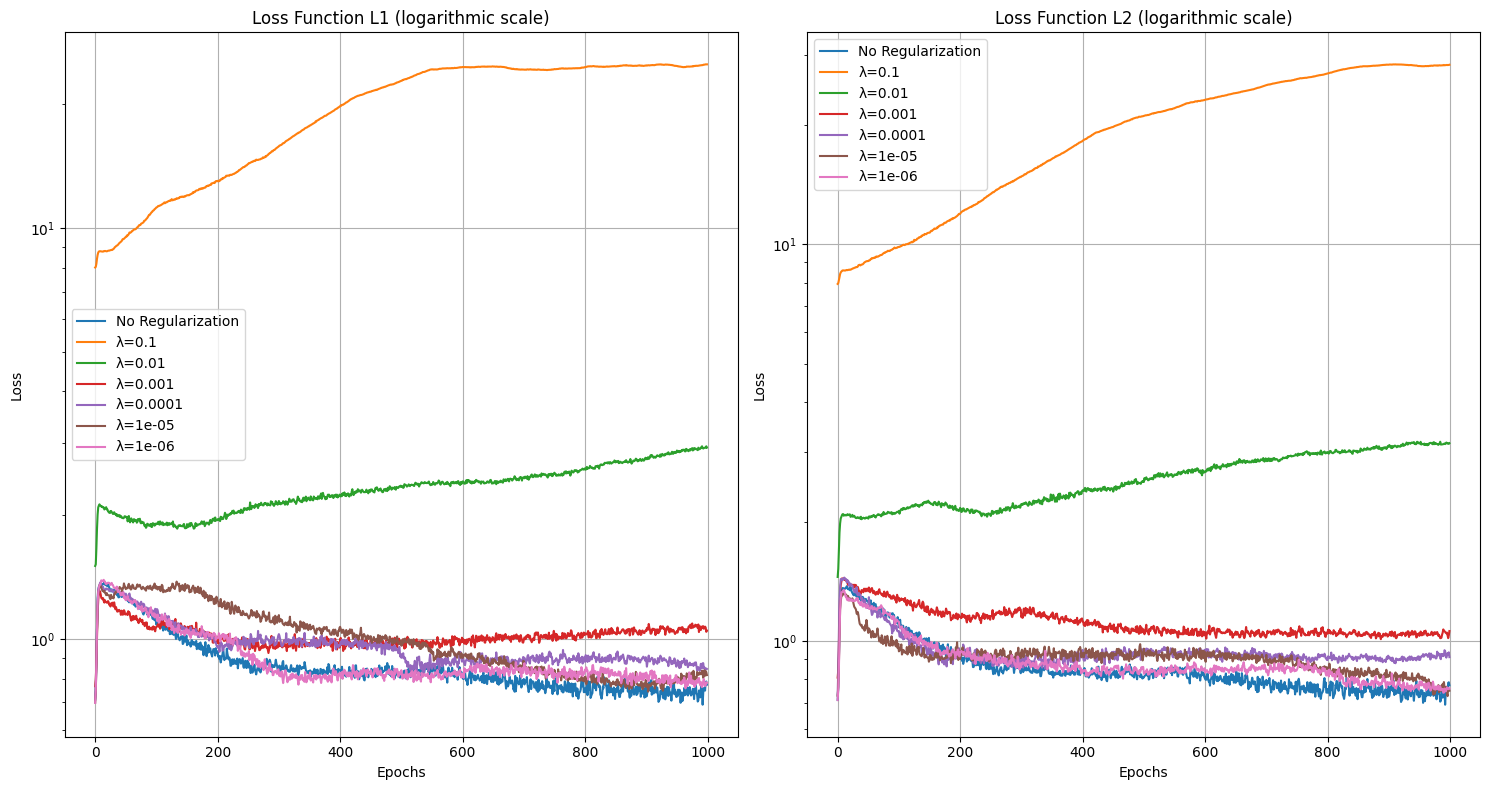

In [68]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(loss_xor3, label='No Regularization')
for lh in loss_histories_l1:
    plt.plot(lh, label=f'λ={lambda_values[loss_histories_l1.index(lh)]}')
plt.title('Loss Function L1 (logarithmic scale)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(loss_xor3, label='No Regularization')
for lh in loss_histories_l2:
    plt.plot(lh, label=f'λ={lambda_values[loss_histories_l2.index(lh)]}')
plt.title('Loss Function L2 (logarithmic scale)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

F-score XOR3: 0.7860654557422911
F-score XOR3 L1: 0.5731532616546487
F-score XOR3 L2: 0.74189204354169


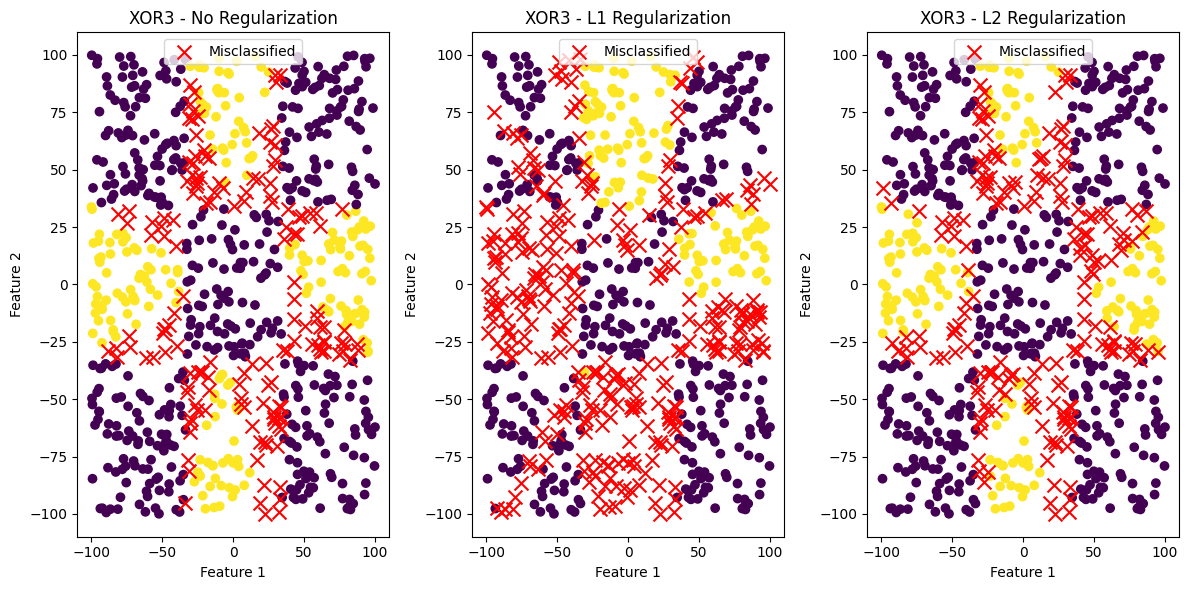

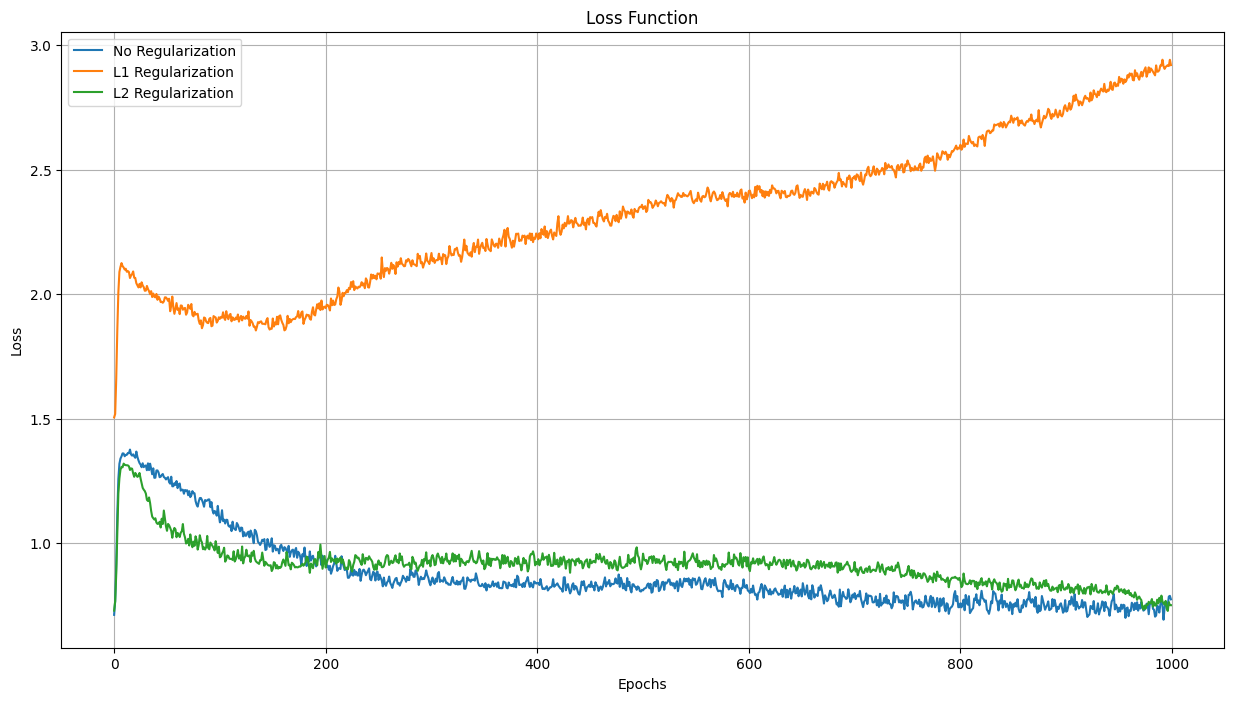

In [73]:
y_pred = nn_xor3.predict(X_xor3_test)
y_pred = np.argmax(y_pred, axis=1).reshape(-1, 1)
y_pred_l1 = nn_xor3_l1.predict(X_xor3_test)
y_pred_l1 = np.argmax(y_pred_l1, axis=1).reshape(-1, 1)
y_pred_l2 = nn_xor3_l2.predict(X_xor3_test)
y_pred_l2 = np.argmax(y_pred_l2, axis=1).reshape(-1, 1)

print("F-score XOR3:", f1_score(y_xor3_test, y_pred, average='macro'))
print("F-score XOR3 L1:", f1_score(y_xor3_test, y_pred_l1, average='macro'))
print("F-score XOR3 L2:", f1_score(y_xor3_test, y_pred_l2, average='macro'))

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plot_classification_results(X_xor3_test, y_xor3_test, y_pred, title='XOR3 - No Regularization')
plt.subplot(1, 3, 2)
plot_classification_results(X_xor3_test, y_xor3_test, y_pred_l1, title='XOR3 - L1 Regularization')
plt.subplot(1, 3, 3)
plot_classification_results(X_xor3_test, y_xor3_test, y_pred_l2, title='XOR3 - L2 Regularization')
plt.tight_layout()
plt.show()

loss = nn_xor3.model_history()
loss_l1 = nn_xor3_l1.model_history()
loss_l2 = nn_xor3_l2.model_history()

plt.figure(figsize=(15, 8))
plt.plot(loss, label='No Regularization')
plt.plot(loss_l1, label='L1 Regularization')
plt.plot(loss_l2, label='L2 Regularization')
plt.title('Loss Function')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()